### Import statements

In [2]:
import openml
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Load in datasets

In [3]:
benchmark_suite_CC18 = openml.study.get_suite('OpenML-CC18')  # obtain the benchmark suite
benchmark_suite_100 = openml.study.get_suite('OpenML100')  # obtain the benchmark suite

### Benchmark RandomForestClassifier and ExtraTreesClassifier with _default parameters_

#### The following sections use the OpenML CC-18 and 100 suites and classifies each dataset using the sklearn's RandomForest classifier and ExtraTrees classifier with default parameters. The task IDs, accuracies, and runtimes of each dataset are compiled into .txt files for later analysis

### RFClassifier

##### Build the scikit-learn ExtraTrees classifier

In [8]:
clf = sklearn.pipeline.make_pipeline(sklearn.preprocessing.Imputer(),
                                     sklearn.ensemble.RandomForestClassifier())

##### RF using OpenML CC-18

In [ ]:
for task_id in benchmark_suite_CC18.tasks:  # iterate over all tasks
    try:
        f = open("RF_accuracies_CC-18_21020.txt","a")
        startTime = datetime.now()
        task = openml.tasks.get_task(task_id) # download the OpenML task
        openml.config.apikey = 'c9ea8896542dd998ea42685f14e2bc14'  # set the OpenML Api Key
        run = openml.runs.run_model_on_task(clf, task) # run classifier on splits (requires API key)
        score = run.get_metric_fn(sklearn.metrics.accuracy_score) # print accuracy score
        print('Data set: %s; Accuracy: %0.2f' % (task.get_dataset().name,score.mean()))
        print('Time: '+ str(datetime.now() - startTime))
        f.write('%i,%s,%0.4f,%s,\n' % (task_id,task.get_dataset().name,score.mean(),str(datetime.now() - startTime)))
        f.close()
    except:
        print('Error in' + str(task_id))

##### RF using OpenML 100

In [ ]:
for task_id in benchmark_suite_100.tasks:  # iterate over all tasks
    try:
        f = open("RF_accuracies_100_21020.txt","a")
        startTime = datetime.now()
        task = openml.tasks.get_task(task_id) # download the OpenML task
        openml.config.apikey = 'c9ea8896542dd998ea42685f14e2bc14'  # set the OpenML Api Key
        run = openml.runs.run_model_on_task(clf, task) # run classifier on splits (requires API key)
        score = run.get_metric_fn(sklearn.metrics.accuracy_score) # print accuracy score
        print('Data set: %s; Accuracy: %0.2f' % (task.get_dataset().name,score.mean()))
        print('Time: '+ str(datetime.now() - startTime))
        f.write('%i,%s,%0.4f,%s,\n' % (task_id,task.get_dataset().name,score.mean(),str(datetime.now() - startTime)))
        f.close()
    except:
        print('Error in' + str(task_id))

### ExtraTrees Classifier
##### Build the scikit-learn ExtraTrees classifier

In [9]:
clf = sklearn.pipeline.make_pipeline(sklearn.preprocessing.Imputer(),
                                     sklearn.ensemble.ExtraTreesClassifier())

##### ET using OpenML CC-18

In [ ]:
for task_id in benchmark_suite_CC18.tasks:  # iterate over all tasks
    try:
        f = open("ET_accuracies_CC-18_21020.txt","a")
        startTime = datetime.now()
        task = openml.tasks.get_task(task_id) # download the OpenML task
        openml.config.apikey = 'c9ea8896542dd998ea42685f14e2bc14'  # set the OpenML Api Key
        run = openml.runs.run_model_on_task(clf, task) # run classifier on splits (requires API key)
        score = run.get_metric_fn(sklearn.metrics.accuracy_score) # print accuracy score
        print('Data set: %s; Accuracy: %0.2f' % (task.get_dataset().name,score.mean()))
        print('Time: '+ str(datetime.now() - startTime))
        f.write('%i,%s,%0.4f,%s,\n' % (task_id,task.get_dataset().name,score.mean(),str(datetime.now() - startTime)))
        f.close()
    except:
        print('Error in' + str(task_id))

##### ET using OpenML 100

In [ ]:
for task_id in benchmark_suite_100.tasks:  # iterate over all tasks
    try:
        f = open("ET_accuracies_100_21020.txt","a")
        startTime = datetime.now()
        task = openml.tasks.get_task(task_id) # download the OpenML task
        openml.config.apikey = 'c9ea8896542dd998ea42685f14e2bc14'  # set the OpenML Api Key
        run = openml.runs.run_model_on_task(clf, task) # run classifier on splits (requires API key)
        score = run.get_metric_fn(sklearn.metrics.accuracy_score) # print accuracy score
        print('Data set: %s; Accuracy: %0.2f' % (task.get_dataset().name,score.mean()))
        print('Time: '+ str(datetime.now() - startTime))
        f.write('%i,%s,%0.4f,%s,\n' % (task_id,task.get_dataset().name,score.mean(),str(datetime.now() - startTime)))
        f.close()
    except:
        print('Error in' + str(task_id))

### Compare accuracies and runtimes between RF and ET classifiers

#### The following sections compare the compiled accuracy and runtime results of both classifiers on the OpenML CC-18 and 100 suites. The accuracies and runtimes of each dataset are plotted against the dataset's number of features and number of samples.

### Load in dataset properties, accuracies, and runtimes

##### Obtain the properties of datasets in Open ML CC-18

In [4]:
dimen_CC18 = [] # for all datasets: number of samples (column 0), number of features (column 1) 

for task_id in benchmark_suite_CC18.tasks:  # iterate over all tasks
    try:
        task = openml.tasks.get_task(task_id)  # download the OpenML task
        features_CC18, targets_CC18 = task.get_X_and_y()  # load in dataset properties
        dimen_CC18.append(np.shape(features_CC18)) # compile all feature and sample numbers
    except:
        print('Error in OpenML CC-18 dataset ' + str(task_id)) # print task id of erring datasets

##### Obtain the properties of datasets in Open ML 100

In [5]:
dimen_100 = [] # for all datasets: number of samples (column 0), number of features (column 1)

for task_id in benchmark_suite_100.tasks:  # iterate over all tasks
    try:
        task = openml.tasks.get_task(task_id)  # download the OpenML task
        features_100, targets_100 = task.get_X_and_y()  # load in dataset properties
        dimen_100.append(np.shape(features_100)) # compile all feature and sample numbers
    except:
        print('Error in OpenML 100 dataset ' + str(task_id)) # print task id of erring datasets

Error in OpenML 100 dataset 34536


##### Read in RF accuracies of OpenML CC-18 datasets

In [6]:
acc_RF_CC18 = open('RF_accuracies_CC-18_21020.txt','r')

RF_taskID_CC18 = []
RF_name_CC18 = []
RF_accuracy_CC18 = []
RF_time_CC18 = []

for line in acc_RF_CC18:
    fields = line.split(',')
    RF_taskID_CC18.append(fields[0])
    RF_name_CC18.append(fields[1])
    RF_accuracy_CC18.append(float(fields[2]))
    RF_time_CC18.append(fields[3])

print(np.shape(RF_accuracy_CC18))

(72,)


##### Read in RF accuracies of OpenML 100 datasets

In [7]:
acc_RF_100 = open('RF_accuracies_100_21020.txt','r')

RF_taskID_100 = []
RF_name_100 = []
RF_accuracy_100 = []
RF_time_100 = []

for line in acc_RF_100:
    fields = line.split(',')
    RF_taskID_100.append(fields[0])
    RF_name_100.append(fields[1])
    RF_accuracy_100.append(float(fields[2]))
    RF_time_100.append(fields[3])

print(np.shape(RF_accuracy_100))

(99,)


##### Read in ET accuracies of OpenML CC-18 datasets

In [8]:
acc_ET_CC18 = open('ET_accuracies_CC-18_21020.txt','r')

ET_taskID_CC18 = []
ET_name_CC18 = []
ET_accuracy_CC18 = []
ET_time_CC18 = []
    
for line in acc_ET_CC18:
    fields = line.split(',')
    ET_taskID_CC18.append(fields[0])
    ET_name_CC18.append(fields[1])
    ET_accuracy_CC18.append(float(fields[2]))
    ET_time_CC18.append(fields[3])

print(np.shape(ET_accuracy_CC18))

(72,)


##### Read in ET accuracies of OpenML 100 datasets

In [9]:
acc_ET_100 = open('ET_accuracies_100_21020.txt','r')

ET_taskID_100 = []
ET_name_100 = []
ET_accuracy_100 = []
ET_time_100 = []

for line in acc_ET_100:
    fields = line.split(',')
    ET_taskID_100.append(fields[0])
    ET_name_100.append(fields[1])
    ET_accuracy_100.append(float(fields[2]))
    ET_time_100.append(fields[3])

print(np.shape(ET_accuracy_100))

(99,)


### Find RF vs. ET accuracy differences

##### OpenML CC-18

Text(0.5, 1.0, '100 Accuracy Difference Histogram')

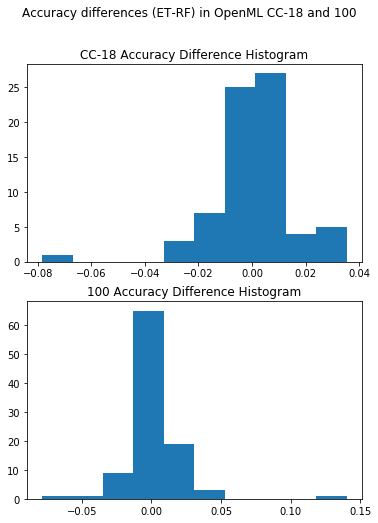

In [10]:
acc_diffs_CC18 = []

for i in range(len(ET_accuracy_CC18)):
    acc_diffs_CC18.append(ET_accuracy_CC18[i]-RF_accuracy_CC18[i])

acc_diffs_100 = []

for i in range(len(ET_accuracy_100)):
    acc_diffs_100.append(ET_accuracy_100[i]-RF_accuracy_100[i])

fig, (hist_CC18, hist_100) = plt.subplots(2, figsize=(6, 8))
fig.suptitle('Accuracy differences (ET-RF) in OpenML CC-18 and 100')
hist_CC18.hist(acc_diffs_CC18)
hist_CC18.set_title('CC-18 Accuracy Difference Histogram')
hist_100.hist(acc_diffs_100)
hist_100.set_title('100 Accuracy Difference Histogram')

### Plot RF vs. ET accuracy differences (scatterplot)

##### OpenML CC-18

###### Set up datapoints with the accuracy differences vs. number of features and number of samples, separately

In [11]:
n_features_CC18 = []
n_samples_CC18 = []

for i in range(len(ET_time_CC18)):
    n_features_CC18.append(dimen_CC18[i][1])
    n_samples_CC18.append(dimen_CC18[i][0])

n_features_CC18 = np.vstack((n_features_CC18, acc_diffs_CC18))
n_samples_CC18 = np.vstack((n_samples_CC18, acc_diffs_CC18))

###### Plot each dataset's accuracy difference against its number of features and number of samples

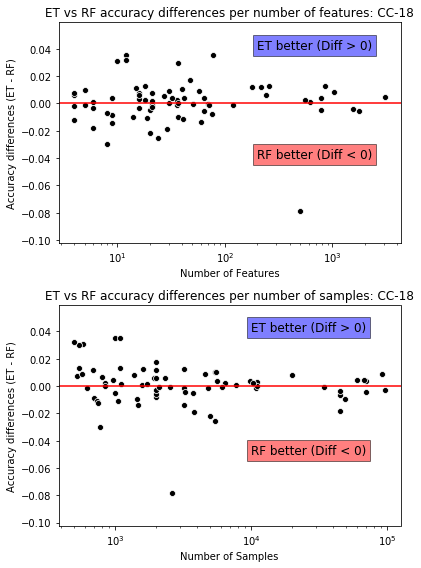

In [12]:
fig, (feat_CC18, samp_CC18) = plt.subplots(2, figsize=(6, 8))

g1 = sns.scatterplot(n_features_CC18[:][0],n_features_CC18[:][1],color='k', ax=feat_CC18)
feat_CC18.axhline(y=0, color='r', linestyle='-')
feat_CC18.set(xlabel='Number of Features',ylabel='Accuracy differences (ET - RF)')
feat_CC18.set_xscale('log')
feat_CC18.set_title('ET vs RF accuracy differences per number of features: CC-18')
feat_CC18.text(200, 0.04, "ET better (Diff > 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
feat_CC18.text(200, -0.04, "RF better (Diff < 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

g2 = sns.scatterplot(n_samples_CC18[:][0],n_samples_CC18[:][1],color='k', ax=samp_CC18)
samp_CC18.axhline(y=0, color='r', linestyle='-')
samp_CC18.set(xlabel='Number of Samples',ylabel='Accuracy differences (ET - RF)')
samp_CC18.set_xscale('log')
samp_CC18.set_title('ET vs RF accuracy differences per number of samples: CC-18')
samp_CC18.text(10000, 0.04, "ET better (Diff > 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
samp_CC18.text(10000, -0.05, "RF better (Diff < 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

plt.tight_layout()

###### Plot each dataset's accuracy difference against its number of samples and number of features, with the marker size denoting the relative difference magnitude

ET was better for 39 out of 72 datasets in CC18
RF was better for 33 out of 72 datasets in CC18


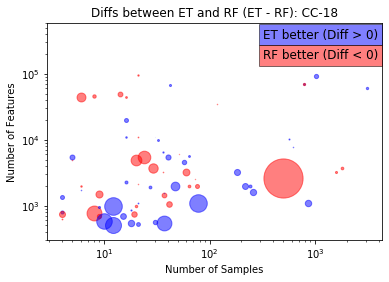

In [13]:
red_CC18 = 0
plt.figure()
for i in range(len(acc_diffs_CC18)):
    if acc_diffs_CC18[i] > 0:
        plt.plot(dimen_CC18[i][1],dimen_CC18[i][0],'bo',MarkerSize = (acc_diffs_CC18[i])*500,alpha=0.5)
    else:
        plt.plot(dimen_CC18[i][1],dimen_CC18[i][0],'ro',MarkerSize = (acc_diffs_CC18[i])*-500,alpha=0.5)
        red_CC18 += 1
plt.xlabel('Number of Samples')
plt.ylabel('Number of Features')
plt.xscale('log')
plt.yscale('log')
plt.ylim((300,600000))
plt.title('Diffs between ET and RF (ET - RF): CC-18')
# plt.legend(['RF better', 'ET better'])
plt.text(320, 350000, "ET better (Diff > 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
plt.text(320, 170000, "RF better (Diff < 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

print('ET was better for ' + str(72-red_CC18) + ' out of 72 datasets in CC18')
print('RF was better for ' + str(red_CC18) + ' out of 72 datasets in CC18')

##### OpenML 100

###### Set up datapoints with the accuracy differences vs. number of features and number of samples, separately

In [14]:
n_features_100 = []
n_samples_100 = []

for i in range(len(ET_time_100)):
    n_features_100.append(dimen_100[i][1])
    n_samples_100.append(dimen_100[i][0])

n_features_100 = np.vstack((n_features_100, acc_diffs_100))
n_samples_100 = np.vstack((n_samples_100, acc_diffs_100))

###### Plot each dataset's accuracy difference against its number of features and number of samples

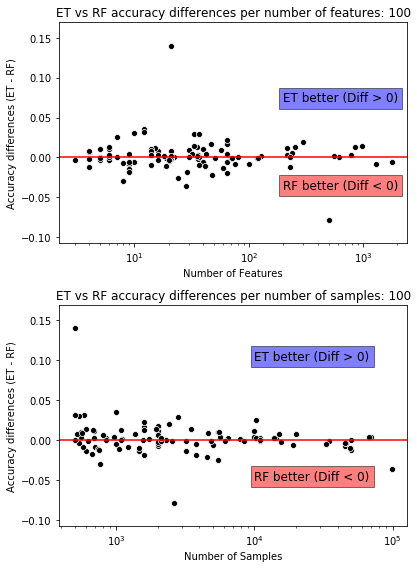

In [15]:
fig, (feat_100, samp_100) = plt.subplots(2, figsize=(6, 8))

g3 = sns.scatterplot(n_features_100[:][0],n_features_100[:][1],color='k', ax=feat_100)
feat_100.axhline(y=0, color='r', linestyle='-')
feat_100.set(xlabel='Number of Features',ylabel='Accuracy differences (ET - RF)')
feat_100.set_xscale('log')
feat_100.set_title('ET vs RF accuracy differences per number of features: 100')
feat_100.text(200, 0.07, "ET better (Diff > 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
feat_100.text(200, -0.04, "RF better (Diff < 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

g4 = sns.scatterplot(n_samples_100[:][0],n_samples_100[:][1],color='k', ax=samp_100)
samp_100.axhline(y=0, color='r', linestyle='-')
samp_100.set(xlabel='Number of Samples',ylabel='Accuracy differences (ET - RF)')
samp_100.set_xscale('log')
samp_100.set_title('ET vs RF accuracy differences per number of samples: 100')
samp_100.text(10000, 0.1, "ET better (Diff > 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
samp_100.text(10000, -0.05, "RF better (Diff < 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

plt.tight_layout()

###### Plot each dataset's accuracy difference against its number of samples and number of features, with the marker size denoting the relative difference magnitude

ET was better for 50 out of 99 datasets in 100
RF was better for 49 out of 99 datasets in 100


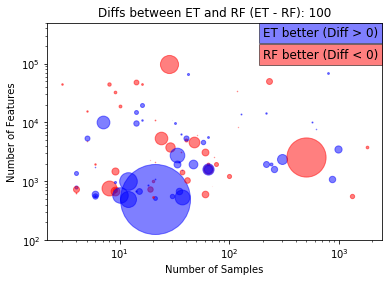

In [16]:
red_100 = 0
plt.figure()
for i in range(len(acc_diffs_100)):
    if acc_diffs_100[i] > 0:
        plt.plot(dimen_100[i][1],dimen_100[i][0],'bo',MarkerSize = (acc_diffs_100[i])*500,alpha=0.5)
    else:
        plt.plot(dimen_100[i][1],dimen_100[i][0],'ro',MarkerSize = (acc_diffs_100[i])*-500,alpha=0.5)
        red_100 += 1
plt.xlabel('Number of Samples')
plt.ylabel('Number of Features')
plt.xscale('log')
plt.yscale('log')
plt.ylim((100,500000))
plt.title('Diffs between ET and RF (ET - RF): 100')
plt.text(200, 290000, "ET better (Diff > 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
plt.text(200, 125000, "RF better (Diff < 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
        
print('ET was better for ' + str(99-red_100) + ' out of 99 datasets in 100')
print('RF was better for ' + str(red_100) + ' out of 99 datasets in 100')

### Plot RF and ET runtimes (scatterplot)

###### Set up time fields

In [17]:
## OpenML CC-18
# ET
ET_hours = []
ET_minutes = []
ET_seconds = []
ET_total_time = []
for time in ET_time_CC18:
    timefields = time.split(':')
    ET_hours.append(timefields[0])
    ET_minutes.append(timefields[1])
    ET_seconds.append(float(timefields[2]))
    ET_total_time.append(float(timefields[0])*3600 + float(timefields[1])*60 + float(timefields[2]))

# RF
RF_hours = []
RF_minutes = []
RF_seconds = []
RF_total_time = []
for time in RF_time_CC18:
    timefields = time.split(':')
    RF_hours.append(timefields[0])
    RF_minutes.append(timefields[1])
    RF_seconds.append(float(timefields[2]))
    RF_total_time.append(float(timefields[0])*3600 + float(timefields[1])*60 + float(timefields[2]))

## OpenML 100
# ET
ET_hours = []
ET_minutes = []
ET_seconds = []
ET_total_time = []
for time in ET_time_100:
    timefields = time.split(':')
    ET_hours.append(timefields[0])
    ET_minutes.append(timefields[1])
    ET_seconds.append(float(timefields[2]))
    ET_total_time.append(float(timefields[0])*3600 + float(timefields[1])*60 + float(timefields[2]))

# RF
RF_hours = []
RF_minutes = []
RF_seconds = []
RF_total_time = []
for time in RF_time_100:
    timefields = time.split(':')
    RF_hours.append(timefields[0])
    RF_minutes.append(timefields[1])
    RF_seconds.append(float(timefields[2]))
    RF_total_time.append(float(timefields[0])*3600 + float(timefields[1])*60 + float(timefields[2]))

###### Find ET vs. RF runtime differences

Text(0.5, 1.0, '100 Runtime Difference Histogram')

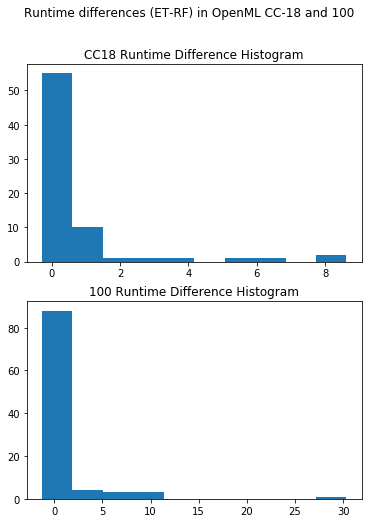

In [18]:
time_diffs_CC18 = []

for i in range(len(ET_time_CC18)):
    time_diffs_CC18.append(RF_total_time[i]-ET_total_time[i])

time_diffs_100 = []

for i in range(len(ET_time_100)):
    time_diffs_100.append(RF_total_time[i]-ET_total_time[i])
    
# print(time_diffs_CC18)
# print(time_diffs_100)

fig, (hist_time_CC18, hist_time_100) = plt.subplots(2, figsize=(6, 8))
fig.suptitle('Runtime differences (ET-RF) in OpenML CC-18 and 100')
hist_time_CC18.hist(time_diffs_CC18)
hist_time_CC18.set_title('CC18 Runtime Difference Histogram')
hist_time_100.hist(time_diffs_100)
hist_time_100.set_title('100 Runtime Difference Histogram')

##### OpenML CC-18

###### Set up datapoints with the runtimes vs. number of features and number of samples, separately

In [19]:
n_features_CC18 = []
n_samples_CC18 = []

for i in range(len(ET_time_CC18)):
    n_features_CC18.append(dimen_CC18[i][1])
    n_samples_CC18.append(dimen_CC18[i][0])

n_features_CC18 = np.vstack((n_features_CC18, time_diffs_CC18))
n_samples_CC18 = np.vstack((n_samples_CC18, time_diffs_CC18))

###### Plot each dataset's runtime difference in OpenML CC-18 against its number of features and number of samples

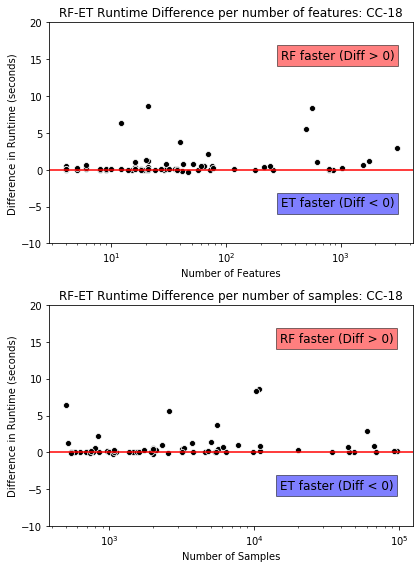

In [20]:
fig, (feat_time_CC18, samp_time_CC18) = plt.subplots(2, figsize=(6, 8))

g5 = sns.scatterplot(n_features_CC18[:][0],n_features_CC18[:][1], color='k', ax=feat_time_CC18)
feat_time_CC18.axhline(y=0, color='r', linestyle='-')
feat_time_CC18.set(xlabel='Number of Features',ylabel='Difference in Runtime (seconds)')
feat_time_CC18.set_xscale('log')
feat_time_CC18.set_ylim([-10,20])
feat_time_CC18.set_title('RF-ET Runtime Difference per number of features: CC-18')
feat_time_CC18.text(300, 15, "RF faster (Diff > 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
feat_time_CC18.text(300, -5, "ET faster (Diff < 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))

g6 = sns.scatterplot(n_samples_CC18[:][0],n_samples_CC18[:][1],color='k', ax=samp_time_CC18)
samp_time_CC18.axhline(y=0, color='r', linestyle='-')
samp_time_CC18.set(xlabel='Number of Samples',ylabel='Difference in Runtime (seconds)')
samp_time_CC18.set_xscale('log')
samp_time_CC18.set_ylim([-10,20])
samp_time_CC18.set_title('RF-ET Runtime Difference per number of samples: CC-18')
samp_time_CC18.text(15000, 15, "RF faster (Diff > 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
samp_time_CC18.text(15000, -5, "ET faster (Diff < 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))

plt.tight_layout()

###### Plot each dataset's runtime against its number of samples and number of features, with the marker size denoting the relative runtime magnitude

ET was faster for 60 out of 72 datasets in CC18
RF was faster for 12 out of 72 datasets in CC18


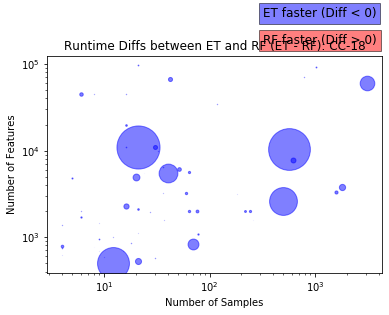

In [28]:
red_CC18 = 0
plt.figure()
for i in range(len(time_diffs_CC18)):
    if time_diffs_CC18[i] > 0:
        plt.plot(dimen_CC18[i][1],dimen_CC18[i][0],'bo',MarkerSize = 5*(time_diffs_CC18[i]),alpha=0.5)
    else:
#         print(time_diffs_100[i])
        plt.plot(dimen_CC18[i][1],dimen_CC18[i][0],'ro',MarkerSize = 5*(time_diffs_CC18[i]),alpha=0.5)
        red_CC18 += 1
plt.xlabel('Number of Samples')
plt.ylabel('Number of Features')
plt.xscale('log')
plt.yscale('log')
# plt.ylim((300,600000))
plt.title('Runtime Diffs between ET and RF (ET - RF): CC-18')
# plt.legend(['RF better', 'ET better'])
plt.text(320, 350000, "ET faster (Diff < 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
plt.text(320, 170000, "RF faster (Diff > 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

print('ET was faster for ' + str(72-red_CC18) + ' out of 72 datasets in CC18')
print('RF was faster for ' + str(red_CC18) + ' out of 72 datasets in CC18')

##### OpenML 100

###### Set up datapoints with the runtimes vs. number of features and number of samples, separately

In [22]:
n_features_100 = []
n_samples_100 = []

for i in range(len(ET_time_100)):
    n_features_100.append(dimen_100[i][1])
    n_samples_100.append(dimen_100[i][0])

n_features_100 = np.vstack((n_features_100, time_diffs_100))
n_samples_100 = np.vstack((n_samples_100, time_diffs_100))

###### Plot each dataset's runtime difference in OpenML 100 against its number of features and number of samples

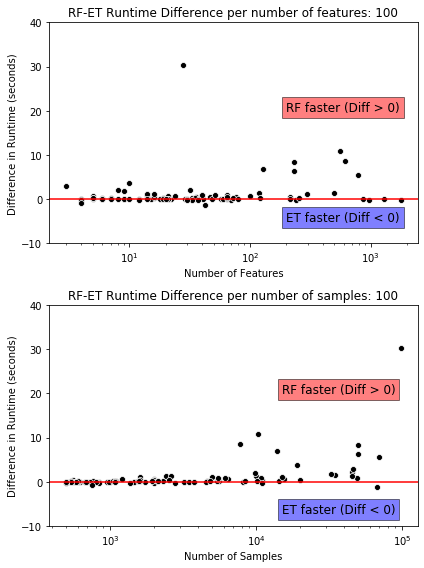

In [23]:
fig, (feat_time_100, samp_time_100) = plt.subplots(2, figsize=(6, 8))

g7 = sns.scatterplot(n_features_100[:][0],n_features_100[:][1], color='k', ax=feat_time_100)
feat_time_100.axhline(y=0, color='r', linestyle='-')
feat_time_100.set(xlabel='Number of Features',ylabel='Difference in Runtime (seconds)')
feat_time_100.set_xscale('log')
feat_time_100.set_ylim([-10,40])
feat_time_100.set_title('RF-ET Runtime Difference per number of features: 100')
feat_time_100.text(200, 20, "RF faster (Diff > 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
feat_time_100.text(200, -5, "ET faster (Diff < 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))

g8 = sns.scatterplot(n_samples_100[:][0],n_samples_100[:][1],color='k', ax=samp_time_100)
samp_time_100.axhline(y=0, color='r', linestyle='-')
samp_time_100.set(xlabel='Number of Samples',ylabel='Difference in Runtime (seconds)')
samp_time_100.set_xscale('log')
samp_time_100.set_ylim([-10,40])
samp_time_100.set_title('RF-ET Runtime Difference per number of samples: 100')
samp_time_100.text(15000, 20, "RF faster (Diff > 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
samp_time_100.text(15000, -7, "ET faster (Diff < 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))

plt.tight_layout()

###### Plot each dataset's runtime against its number of samples and number of features, with the marker size denoting the relative runtime magnitude

ET was faster for 49 out of 72 datasets in 100
RF was faster for 23 out of 72 datasets in 100


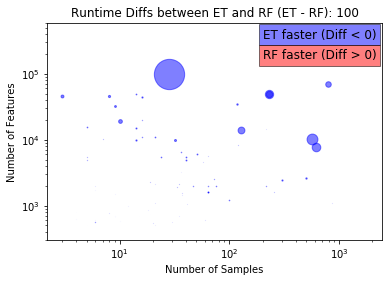

In [24]:
red_100 = 0
plt.figure()
for i in range(len(time_diffs_100)):
    if time_diffs_100[i] > 0:
        plt.plot(dimen_100[i][1],dimen_100[i][0],'bo',MarkerSize = (time_diffs_100[i]),alpha=0.5)
    else:
#         print(time_diffs_100[i])
        plt.plot(dimen_100[i][1],dimen_100[i][0],'ro',MarkerSize = (time_diffs_100[i]),alpha=0.5)
        red_100 += 1
plt.xlabel('Number of Samples')
plt.ylabel('Number of Features')
plt.xscale('log')
plt.yscale('log')
plt.ylim((300,600000))
plt.title('Runtime Diffs between ET and RF (ET - RF): 100')
# plt.legend(['RF better', 'ET better'])
plt.text(200, 350000, "ET faster (Diff < 0)", fontsize=12, bbox=dict(facecolor='blue', alpha=0.5))
plt.text(200, 170000, "RF faster (Diff > 0)", fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

print('ET was faster for ' + str(72-red_100) + ' out of 72 datasets in 100')
print('RF was faster for ' + str(red_100) + ' out of 72 datasets in 100')

### Benchmark RandomForestClassifier and ExtraTreesClassifier with _optimized hyperparameters_

#### The following sections use the OpenML CC-18 and 100 suites and classifies each dataset using the sklearn's RandomForest classifier and ExtraTrees classifier with optimized hyperparameters. The task IDs, accuracies, and runtimes of each dataset are compiled into .txt files for later analysis

### Demonstration of grid search to compare classifier performance
An important step in classifier performance comparison is hyperparameter optimization. Here, we specify the classifer models we want to tune and a dictionary of hyperparameter ranges (preferably similar for fairness in comparision) for each classifier. Then, we find the optimal hyperparameters through a function that uses GridSearchCV and refit the optimized models to obtain accuracies.

In this example, we tune hyperparameters for two classifiers, Random Forest and Extra Trees, and compare their performance on an OpenML-CC18 benchmarking suite dataset (https://www.openml.org/d/15). We can see clearly in the resulting plot that the optimized models perform better than or atleast similar to the default parameter models. On the dataset we use in this example, RF performs marginally better than ExtraTrees overall.

In [29]:
print(__doc__)

import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt

from warnings import simplefilter
simplefilter(action="ignore", category=FutureWarning)
from warnings import simplefilter
simplefilter(action="ignore", category=FutureWarning)

Automatically created module for IPython interactive environment


In [30]:
def hyperparameter_optimization_grid(X, y, *argv):
    """
    Given a classifier and a dictionary of hyperparameters, 
    find optimal hyperparameters using GridSearchCV.

    Parameters
    ----------
    X : numpy.ndarray
        Input data, shape (n_samples, n_features)
    y : numpy.ndarray
        Output data, shape (n_samples, n_outputs)
    *argv : list of tuples (classifier, hyperparameters)
        List of (classifier, hyperparameters) tuples:

        classifier : sklearn-compliant classifier
            For example sklearn.ensemble.RandomForestRegressor, 
            rerf.rerfClassifier, etc
        hyperparameters : dictionary of hyperparameter ranges
            See https://scikit-learn.org/stable/modules/generated
                /sklearn.model_selection.GridSearchCV.html. 

    Returns
    -------
    clf_best_params : dictionary
        Dictionary of best hyperparameters
    """
    
    clf_best_params = {}

    kappa_scorer = make_scorer(cohen_kappa_score)

    # Iterate over all (classifier, hyperparameters) pairs
    for clf, params in argv:

        # Run grid search
        grid_search = GridSearchCV(
            clf, param_grid=params, scoring=kappa_scorer, cv=10, iid=False
        )
        grid_search.fit(X, y)

        # Save results
        clf_best_params[clf] = grid_search.best_params_

        # Generate heatmaps 
        param_heatmap(grid_search, params, str(clf))

        
    return clf_best_params

In [31]:
def param_heatmap(search_object, params, clf_name):
    """
    Given an sklearn parameter search object, dictionary of 
    two parameter ranges, and classifier name, 
    generate heatmap showing model scores for each 
    pair of parameter values.

    Parameters
    ----------
    search_object : sklearn parameter search object
        For example sklearn.model_selection.GridSearchCV
    params : dictionary of hyperparameter ranges
        See https://scikit-learn.org/stable/modules/generated
            /sklearn.model_selection.GridSearchCV.html.
    clf_name : string
        Name of sklearn-compliant classifier
    """
    
    pair_arrays = []
    for i in range(len(params)-1):
        for j in range(len(params)-1):
            param1_name = list(params.keys())[i]
            param2_name = list(params.keys())[j+1]
            param1 = params[param1_name]
            param2 = params[param2_name]
            scores = search_object.cv_results_['mean_test_score'].reshape(
                len(param1), len(param2))
            pair_arrays.append(scores)
                
            a = -np.array(scores)
            a = a.ravel().argsort().argsort().reshape(a.shape)
                
            plt.figure(figsize=(8, 6))
            plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
            plt.imshow(a, interpolation='nearest', cmap=plt.cm.Blues)
            plt.xlabel(param2_name)
            plt.ylabel(param1_name)
            plt.colorbar()
            plt.xticks(np.arange(len(param2)), param2)
            plt.yticks(np.arange(len(param1)), param1)
            plt.title('Grid Search Kappa Rank ' + clf_name)
            plt.show()

#### Building classifiers and specifying parameter ranges to sample from

In [32]:
# get some data
X, y = fetch_openml(data_id=6332, return_X_y=True, as_frame=True) #breast-w dataset: 15
y = pd.factorize(y)[0]
X = X.apply(lambda x: pd.factorize(x)[0])
n_samples, n_features = np.shape(X)

# build a classifier
extraTrees = ExtraTreesClassifier(warm_start=True)

# specify parameters and distributions to sample from
extraTrees_param_dict = {
    "max_features": ["sqrt", "log2", None],
    "n_estimators": [50,100,150,200],
}

# build another classifier
rf = RandomForestClassifier(warm_start=True)

# specify parameters and distributions to sample from
rf_param_dict = {
    "max_features": ["sqrt", "log2", None],
    "n_estimators": [50,100,150,200],
}

TypeError: fetch_openml() got an unexpected keyword argument 'as_frame'

#### Obtaining best parameters dictionary and refitting

In [ ]:
best_params = hyperparameter_optimization_grid(
    X, y, (extraTrees, extraTrees_param_dict), (rf, rf_param_dict)
)

print(best_params)

# extract values from dict - seperate each classifier's param dict
keys, values = zip(*best_params.items())

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [ ]:
def get_accuracy(model, X_train, y_train, X_test, y_test):
    """
    Given a model, train, and test data, 
    fit model and calculate accuracy of predictions.

    Parameters
    ----------
    model : sklearn-compliant classifier
    X_train : numpy.ndarray
        Train input data, shape (n_samples, n_features)
    y_train  numpy.ndarray
        Train output data, shape (n_samples, n_outputs)
    X_test: numpy.ndarray
        Test input data, shape (n_samples, n_features)
    y_test:numpy.ndarray
        Test output data, shape (n_samples, n_outputs)

    Returns
    -------
    accuracy : float
        An sklearn metric for model performance.
    """
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    return accuracy

# get accuracies of optimized and default models
extraTrees_models = [ExtraTreesClassifier(**values[0]), ExtraTreesClassifier()]
extraTrees_acc = []
for model in extraTrees_models:
    extraTrees_acc.append(get_accuracy(
        model, X_train, y_train, X_test, y_test))

rf_models = [RandomForestClassifier(**values[1]), RandomForestClassifier()]
rf_acc = []
for model in rf_models:
    rf_acc.append(get_accuracy(
        model, X_train, y_train, X_test, y_test))
print(extraTrees_acc)
print(rf_acc)

#### Plotting the result

In [ ]:
labels = ["ExtraTrees", "RF"]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, extraTrees_acc, width, label="Optimized")
rects2 = ax.bar(x + width / 2, rf_acc, width, label="Default")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Accuracy")
ax.set_title(
    "Accuracy of Optimized/Default ExtraTrees and RF Models on cylinder-bands Dataset")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = float("%.3f" % (rect.get_height()))
        ax.annotate(
            "{}".format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
        )

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.ylim((0.5, 1))
plt.show()